In [1]:
import numpy as np
import os
import sys
import xarray as xr
import matplotlib.pyplot as plt

Getting the points from Inger's Altimetry for our canada region.

In [2]:
#Coordinates anticlockwise from left bottom.
lon0,lat0=-157.5,50.39
lon1,lat1=-47.1,50.39
lon2,lat2=-47.1,83.21
lon3,lat3=-157.5,83.21

In [22]:
obs=np.loadtxt('GridPointsArctic.xyn',usecols=(0,1),dtype='float')
print(obs[13:,:]) #13 is the tide gauges not the altimetry product. 
print(obs.shape)
obsname=np.loadtxt('GridPointsArctic.xyn',usecols=(2),dtype='str')

[[  0.7139164   60.245341  ]
 [  0.77508375  60.99571735]
 [  0.84547595  61.87063225]
 ...
 [-46.006865    57.992308  ]
 [-45.988599    58.996472  ]
 [-46.054864    59.7397455 ]]
(2730, 2)


getting points in the canada region.

In [3]:
 #here is obs is nx2 vector with lon and lat and obsname is name of the obs it could also be something like M2 amp or phase etc.
def snappingcanadagrid(obs,obsname,lon0,lon1,lat0,lat2): 
    nobs=np.zeros((2,1))
    nobsname=[]
    for i in range(len(obs[:,0])):
        if (lon0<=obs[i,0]<=lon1) and (lat0<=obs[i,1]<=lat2):
            nobs=np.append(nobs,[[obs[i,0]],[obs[i,1]]],axis=1)
            nobsname=np.append(nobsname,obsname[i])
    nobs=nobs[:,1:].T
    print(nobs.shape)
    print(nobsname.shape)
    return(nobs,nobsname)

In [71]:
(nobs,nobsname)=snappingcanadagrid(obs,obsname,lon0,lon1,lat0,lat1)

(743, 2)
(743,)


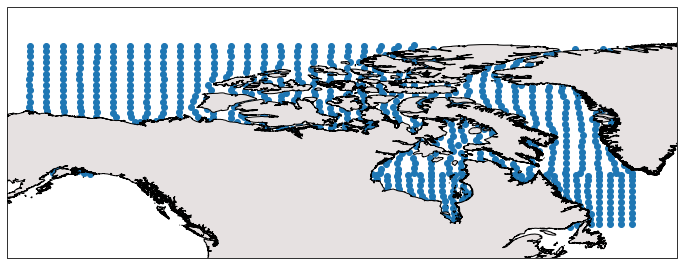

In [69]:
import cartopy.crs as ccrs
import cartopy.feature as cpf 
   
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(12, 12), frameon=True)
ax=plt.axes(projection=ccrs.PlateCarree()) 
ax.set_extent([-160,-40,45,90]) 
# ax.set_extent([-180,180,45,90])  
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='#e6e1e1',alpha=1)
ax.add_feature(feature)

plt.scatter(nobs[:,0],nobs[:,1],transform=ccrs.PlateCarree())
plt.show()

In [ ]:
vec=np.hstack((nobs,nobsname.reshape(len(nobsname),1)))
print(vec.shape)
print(vec)

In [ ]:
np.savetxt('AltimetryCanadaObs.xyn',vec,fmt='%s',delimiter="\t")

Reading the Altimetry data. 

In [4]:
altdata=xr.open_dataset('ModM2Arctic_altimetry.nc')
print(altdata.info())
lonsta=altdata.longitude.values
latsta=altdata.latitude.values
lonlatvec=np.vstack((lonsta,latsta)).T
staname=altdata.stations.values
M2amp=altdata.Ampl_mean.values
M2ph=altdata.Phase_mean.values
lonlatvec.shape

xarray.Dataset {
dimensions:
	stations = 2610 ;

variables:
	float32 latitude(stations) ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:units = degrees_north ;
	float32 longitude(stations) ;
		longitude:standard_name = longitude ;
		longitude:long_name = longitude ;
		longitude:units = degrees_east ;
	float32 Ampl_mean(stations) ;
		Ampl_mean:standard_name = Ampl_mean ;
		Ampl_mean:long_name = Yearly average amplitude of M2 tide ;
		Ampl_mean:units = m ;
	float32 Ampl_sept(stations) ;
		Ampl_sept:standard_name = Ampl_sept ;
		Ampl_sept:long_name = Monthly average amplitude of M2 tide; September ;
		Ampl_sept:units = m ;
	float32 Ampl_march(stations) ;
		Ampl_march:standard_name = Ampl_march ;
		Ampl_march:long_name = Monthly average amplitude of M2 tide; March ;
		Ampl_march:units = m ;
	float32 Ampl_modulation(stations) ;
		Ampl_modulation:standard_name = Ampl_modulation ;
		Ampl_modulation:long_name = Magnitude of seasonal modulation of M2 tide am

(2610, 2)

In [5]:
(svec,sM2amp)=snappingcanadagrid(lonlatvec,M2amp,lon0,lon1,lat0,lat1)
(svec,sM2ph)=snappingcanadagrid(lonlatvec,M2ph,lon0,lon1,lat0,lat1)
(svec,sM2ampmar)=snappingcanadagrid(lonlatvec,altdata.Ampl_march.values,lon0,lon1,lat0,lat1)
(svec,sM2phmar)=snappingcanadagrid(lonlatvec,altdata.Phase_march.values,lon0,lon1,lat0,lat1)
(svec,sM2ampsep)=snappingcanadagrid(lonlatvec,altdata.Ampl_sept.values,lon0,lon1,lat0,lat1)
(svec,sM2phsep)=snappingcanadagrid(lonlatvec,altdata.Phase_sept.values,lon0,lon1,lat0,lat1)
(svec,sM2ampmod)=snappingcanadagrid(lonlatvec,altdata.Ampl_modulation.values,lon0,lon1,lat0,lat1)
(svec,sM2phmod)=snappingcanadagrid(lonlatvec,altdata.Phase_modulation.values,lon0,lon1,lat0,lat1)

(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)
(683, 2)
(683,)


In [ ]:
##creating a nc file of this snapped data from inger's altimetry! 
ds=xr.Dataset({'Ampl':Amp,'Ph':Ph,'lon':Lon,'lat':Lat})
    ds.to_netcdf(name+'.nc')

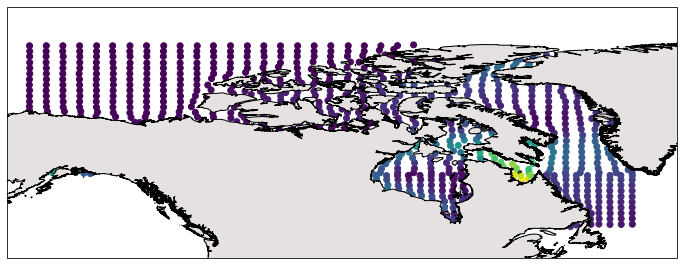

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cpf 
   
# marking the x-axis and y-axis 
fig=plt.figure(figsize=(12, 12), frameon=True)
ax=plt.axes(projection=ccrs.PlateCarree()) 
ax.set_extent([-160,-40,45,90]) 
# ax.set_extent([-180,180,45,90])  
feature=cpf.GSHHSFeature(scale='i',levels=[1],facecolor='#e6e1e1',alpha=1)
ax.add_feature(feature)

plt.scatter(svec[:,0],svec[:,1],c=sM2amp,transform=ccrs.PlateCarree())
plt.show()

Getting value of M2 at those points.

In [78]:
M2amp=altdata.Ampl_march.values
M2ampcan=np.where(vec==svec,M2amp)
print(M2ampcan.shape)

<ipython-input-78-0ab6c1a8523f>:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  M2ampcan=np.where(vec==svec,M2amp)


ValueError: either both or neither of x and y should be given

Snapping the points/stations from main file to the points in the altimetry. 

In [45]:
#This funcion snaps a vector say vec1 to locations in vec2. So for example in the case of Inger's altimetry data we had an issue 
# where altimetry didn't give good results at all the 2717 points. so she had results at 2610 points. This will help us get those 2610 points from 2717 points.

def snapstations(vec1,vec2,reltol):
    #vec2 one to compare to, one with lower number of values. 
    # vec1 the superset of vec2 # these are both nx2 arrays x2 are lon and lat respectively.
    delindex=[]
    xvec1=[];yvec1=[]
    for i in range(len(vec2[:,0])):
        x=vec2[i,0];y=vec2[i,1]
        commonx=np.isclose(vec1[:,0],x,rtol=reltol,atol=0.0 )
        commony=np.isclose(vec1[:,1],y,rtol=reltol,atol=0.0)
        trueindexx=np.where(commonx==True)
        trueindexy=np.where(commony==True)
        index=(np.intersect1d(trueindexx,trueindexy))
        if len(index)==0:
            delindex=np.append(delindex,i)
            print(delindex)
            continue
#         elif len(index)>1:
#             index=int(index[0])
#             print(index)
        else:
            index=int(index)
#             print(index)
#         print(vec1[index,0],vec1[index,1])
#         print(x,y)
        xvec1=np.append(xvec1,vec1[index,0])
        yvec1=np.append(yvec1,vec1[index,1])
        
    nvec1=np.vstack((xvec1,yvec1)).T
    
# 	    IMamp=np.append(IMamp,Mamp[index])
# 	    IMph=np.append(IMph,Mph[index])
# 	print(len(UMlon))
# 	Olon=np.delete(Olon,delindex.astype(int))
# 	Olat=np.delete(Olat,delindex.astype(int))
# 	Oamp=np.delete(Oamp,delindex.astype(int))
# 	Oph=np.delete(Oph,delindex.astype(int))
    return(nvec1)
        

In [67]:
nvec=snapstations(obs,vec,1e-3)
print(nvec.shape)

(2610, 2)


This mat file below contains all the data for 2730-13=2717 points. but only points flagged 0 are considered. 

In [7]:
import scipy.io
M2mat=scipy.io.loadmat('fullM2.mat')
print(M2mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jul 19 17:07:54 2020', '__version__': '1.0', '__globals__': [], 'amp': array([[0.49812052, 0.51671016, 0.49994432, ...,        nan,        nan,
               nan]]), 'ampMarch': array([[0.49970516, 0.50962922, 0.47417213, ...,        nan,        nan,
               nan]]), 'ampSept': array([[0.47436379, 0.50072889, 0.50323509, ...,        nan,        nan,
               nan]]), 'flags': array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'lat': array([[60.245341  , 60.99571735, 61.87063225, ..., 57.993104  ,
        58.996049  , 59.739369  ]]), 'locMax': array([[126. , 154.5, 206.5, ...,   nan,   nan,   nan]]), 'lon': array([[  0.7139164 ,   0.77508375,   0.84547595, ..., -46.0069345 ,
        -45.991874  , -46.062883  ]]), 'phase': array([[300.0412506 , 288.622763  , 283.60436463, ...,          nan,
                 nan,          nan]]), 'phaseMS': array([[0.48679695, 2.23820084, 0.03058868, ...,        nan,        n